# Compresión con PCA

En este _notebook_ vamos aprender cómo usar PCA para comprimir imágenes. Lo que vamos a hacer es tomar una foto del _dataset_ MNIST, aprender una representasión en una dimensión más baja, y visualizar la imagen después de haber "perdido" algo de información.

## Ejemplo con el _dataset_ Iris

Vamos a partir con el _dataset_ Iris, para entender a alto nivel que significa comprimir en este contexto. Nos vamos a quedar solamente con el largo y ancho del pétalo para poder visualizarlo.

In [5]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import pandas as pd

iris = load_iris()

# Recordemos que el dataset original tiene 4 features
X = pd.DataFrame(iris['data'], columns=iris['feature_names'])
y = iris['target']

X = X[["petal length (cm)", "petal width (cm)"]]
X

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


Ahora vamos a reducir la dimensionalidad. Para esto vamos a usar la clase `PCA` que ya importamos. Le vamos a pedir que transforme este _dataset_ a uno de dos dimensiones.

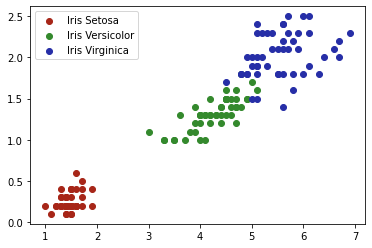

In [6]:
import matplotlib.pyplot as plt

cmap_bold = ['#a72618', '#34892d', '#262ea7']

plt.scatter(X[y==0]["petal length (cm)"], X[y==0]["petal width (cm)"], c=cmap_bold[0], label='Iris Setosa')
plt.scatter(X[y==1]["petal length (cm)"], X[y==1]["petal width (cm)"], c=cmap_bold[1], label='Iris Versicolor')
plt.scatter(X[y==2]["petal length (cm)"], X[y==2]["petal width (cm)"], c=cmap_bold[2], label='Iris Virginica')

plt.legend()
plt.show()

Ahora vamos a reducir la dimensión de este _dataset_ a una dimensión.

In [7]:
# Ahora vamos a reducir la dimensionalidad

# Queremos reducir a dos dimensiones
pca = PCA(n_components=1)

# Guardamos el dataset pero ahora en su versión reducida en 2 dimensiones
X_1D = pca.fit_transform(X)
X_1D = pd.DataFrame(X_1D, columns=["dimension 1"])
X_1D

,dimension 1
0,-2.561012
1,-2.561012
2,-2.653190
3,-2.468834
4,-2.561012
...,...
145,1.755953
146,1.416510
147,1.639637
148,1.940308


Ahora vamos a visualizar en una recta cómo resultó la reducción de las dimensiones.

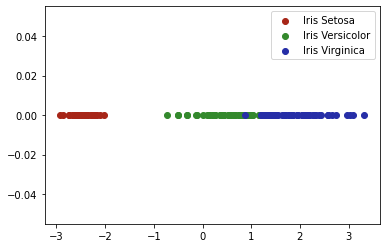

In [8]:
import matplotlib.pyplot as plt
import numpy as np

cmap_bold = ['#a72618', '#34892d', '#262ea7']
y_0 = np.zeros(50)

plt.scatter(X_1D[y==0]["dimension 1"], y_0, c=cmap_bold[0], label='Iris Setosa')
plt.scatter(X_1D[y==1]["dimension 1"],y_0, c=cmap_bold[1], label='Iris Versicolor')
plt.scatter(X_1D[y==2]["dimension 1"], y_0, c=cmap_bold[2], label='Iris Virginica')

plt.legend()
plt.show()

Como vemos, las clases se aún se pueden distinguir. De hecho, para ver "cuanto porcentaje de varianza conservamos", podemos preguntarlo como vimos anteriormente.

In [9]:
pca.explained_variance_ratio_

array([0.99025066])

Esto quiere decir (a grandes rasgos) que esta dimensión guarda un 99% de la información del _dataset_. Ahora lo que vamos a ver es que podemos usar una transformación inversa, para pasar puntos en una dimensión a la dimensión original (dos dimensiones).

In [10]:
X_2D_from_1D = pca.inverse_transform(X_1D)
df_2D_from_1D = pd.DataFrame(X_2D_from_1D, columns=["dimension 1", "dimension 2"])
df_2D_from_1D

,dimension 1,dimension 2
0,1.397316,0.206381
1,1.397316,0.206381
2,1.312349,0.170642
3,1.482284,0.242120
4,1.397316,0.206381
...,...,...
145,5.376598,1.880149
146,5.063707,1.748541
147,5.269381,1.835051
148,5.546533,1.951627


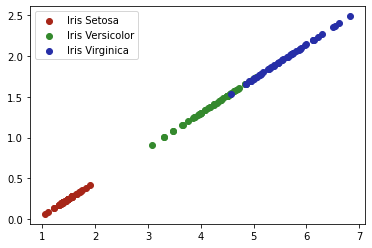

In [11]:
import matplotlib.pyplot as plt

cmap_bold = ['#a72618', '#34892d', '#262ea7']

plt.scatter(df_2D_from_1D[y==0]["dimension 1"], df_2D_from_1D[y==0]["dimension 2"], c=cmap_bold[0], label='Iris Setosa')
plt.scatter(df_2D_from_1D[y==1]["dimension 1"], df_2D_from_1D[y==1]["dimension 2"], c=cmap_bold[1], label='Iris Versicolor')
plt.scatter(df_2D_from_1D[y==2]["dimension 1"], df_2D_from_1D[y==2]["dimension 2"], c=cmap_bold[2], label='Iris Virginica')

plt.legend()
plt.show()

¿Qué fue lo que pasó acá? ¿Por qué al volver a 2 dimensiones los datos se ven así? Esto es porque al haber pasado de dos dimensiones a una perdimos información. Esa información no la vamos a recuperar al volver a la dimensión original, pero si podemos tener una idea de cómo se verían nuestros datos en la dimensión original. Aquí lo que pasa es que los datos quedan sobre una recta, y perdimos la información de cuanto varía cada punto con respecto a la recta.

Esta misma idea la podemos replicar con las imágenes del _dataset_ MNIST para comprimir una imagen a menos dimensiones, y luego volver a visualizarla aunque esté comprimida.

## Compresión de Imágenes del _dataset_ MNIST

Ahora vamos a seguir con el mismo procedimiento pero utilizando el _dataset_ MNIST. Nuevamente, trabajaremos solamente con las primeras 2000 imágenes para que los procedimientos tomen menos tiempo.

In [12]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
import numpy as np

mnist = fetch_openml('mnist_784', version=1, as_frame=True)
X, y = mnist['data'], mnist['target']
y = y.astype(np.uint8)

# Tomamos los primeros 2000 elementos para que tome menos tiempo.
X, y = X[:2000], y[:2000]

# Estandarizamos los datos
std_scaler = StandardScaler()
X_std = std_scaler.fit_transform(X)

# 0.95 porque queremos mantener el 95% de la varianza
pca = PCA(n_components=0.95)
X_95 = pca.fit_transform(X_std)
X_95  

array([[-4.20347101e-01, -3.88576917e+00,  4.15501936e-01, ...,
         6.98625188e-01,  5.71569041e-01,  2.61787310e-01],
       [ 9.22649594e+00, -6.51331240e+00, -2.82104081e+00, ...,
        -2.99857891e-02,  5.84122046e-02, -2.80955206e-01],
       [ 2.22031477e+00,  9.11610892e+00, -4.48272620e+00, ...,
        -9.13165655e-01,  6.25796242e-02, -1.16572380e+00],
       ...,
       [ 9.26338425e+00,  6.55218527e-01,  5.26029711e+00, ...,
        -4.97429457e-03,  1.03797817e+00, -2.37501467e-01],
       [-4.88053053e+00,  7.07698426e-02,  3.20772145e+00, ...,
         1.05419535e-01, -4.84320996e-01, -7.90264103e-01],
       [ 2.42143023e+01, -1.04139928e+00, -2.59444905e+00, ...,
         5.59072013e-01,  3.82496885e-01, -2.16845531e-01]])

Veamos la dimensión del _dataset_ comprimido.

In [13]:
X_95.shape

(2000, 233)

De las 784 _features_ nos quedamos con 233. Ahora vamos a transformar una imagen del _dataset_ a una versión comprimida. Luego vamos a visualizar esta versión comprimida.

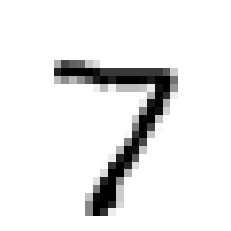

In [14]:
some_digit = mnist["data"].iloc[60000]
some_digit_image = some_digit.values.reshape(28, 28)

plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')
plt.show()

In [15]:
some_digit_std = std_scaler.transform([some_digit])
some_digit_compressed = pca.transform(some_digit_std)
some_digit_compressed

array([[-4.66208156e+00,  4.67122578e+00, -7.38393216e+00,
        -2.64111450e+00,  1.56883237e+00,  1.14664923e+00,
        -3.84508502e+00,  5.72263339e+00,  5.23287303e+00,
        -9.02298222e-01, -8.23035451e-01, -3.67598306e+00,
        -4.63090500e-01, -5.35773330e-01, -3.37520878e+00,
         8.39001139e-01, -5.88632854e-01, -2.87674888e+00,
         1.91006491e+00,  2.42583980e+00,  1.18225600e+00,
         5.33908195e-01,  2.38529325e+00, -2.17962412e-02,
         1.18055256e+00,  4.69095927e+00,  3.73049337e-02,
        -8.96533732e-01, -1.71588289e+00,  1.13643459e+00,
        -1.30605120e+00,  1.05331634e-01,  6.80511846e-01,
        -2.73880339e+00, -1.11918808e+00, -1.35254484e+00,
        -1.04024096e+00,  6.78623906e-01, -7.26279181e-01,
        -1.39679401e+00, -7.28640467e-02, -3.07736581e+00,
         6.24134939e-01, -1.92206621e+00,  1.53929384e+00,
        -1.58920658e+00, -3.97472260e-01,  7.14977243e-01,
         1.61327354e+00, -7.91013397e-01, -7.52793906e-0

In [16]:
some_digit_compressed.shape

(1, 233)

Ahora lo vamos a descomprimir. Para esto usamos la transformada inversa de PCA y luego la del `StandardScaler`. Con eso vamos a generar una imagen de $28 \times 28$ que podemos visualizar.

In [17]:
some_digit_inv = pca.inverse_transform(some_digit_compressed)
some_digit_inv_no_std = std_scaler.inverse_transform(some_digit_inv)
some_digit_inv_no_std.shape

(1, 784)

Ahora vamos a mostrar la versión descomprimida.

In [18]:
some_digit_inv_no_std = some_digit_inv_no_std[0]
some_digit_inv_no_std

array([ 5.82432716e-17,  1.01014247e-16,  5.89226694e-17,  3.37092188e-15,
       -1.15399250e-15,  5.52477475e-18, -2.19559557e-15, -4.19918846e-16,
       -7.38268807e-16,  2.93947130e-15,  3.13130948e-15,  1.75671679e-15,
        1.12268427e-15,  1.83308127e-15,  1.82135040e-15,  5.98104350e-16,
        8.36026482e-17, -1.22549027e-16,  1.10358226e-15,  3.23510080e-16,
        2.23357012e-15,  1.25895435e-15,  4.18668346e-16,  2.94014400e-16,
        7.18460021e-17, -6.53062407e-16,  3.47011090e-16, -2.00021382e-16,
       -1.22758925e-15,  1.82311547e-15, -3.43274140e-16,  3.74452095e-17,
        2.70520131e-16,  5.50667623e-16, -4.64851347e-16,  1.85203619e-15,
        2.03605257e-15, -1.20620663e-15,  8.14870447e-03,  5.05219677e-02,
        1.03036047e-01,  2.80084096e-01,  2.32016620e-01,  1.41807585e-01,
       -6.82732624e-02, -2.94648272e-01,  4.02479893e-01,  4.37834929e-02,
       -4.17664904e-01,  1.68702314e-03,  7.50794195e-02,  1.05720709e-16,
       -1.83844951e-16,  

In [19]:
some_digit_inv_no_std.shape

(784,)

Y ahora vamos a visualizar.

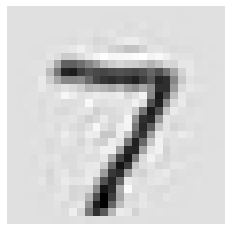

In [20]:
some_digit_image_v2 = some_digit_inv_no_std.reshape(28, 28)

plt.imshow(some_digit_image_v2, cmap='binary')
plt.axis('off')
plt.show()

Como vemos, hay pérdida de calidad, pero podemos ver de forma clara el dígito.